 # Least Squares and Nearest Neighbors

##### Scenario 1: The training data in each class were generated from bivariate Gaussian distributions with uncorrelated components and different means.

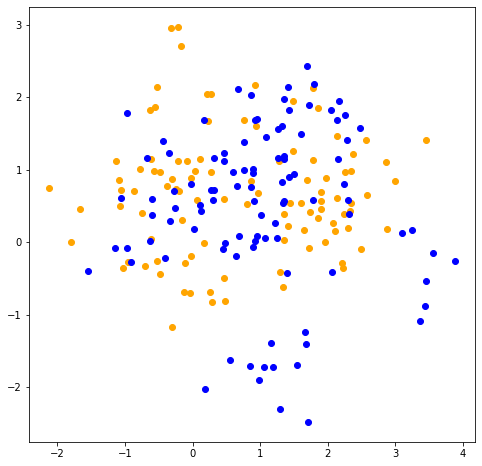

In [6]:

%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

sample_size = 100

def generate_data(size, mean):
    identity = np.identity(2)
    m = np.random.multivariate_normal(mean, identity, 10)
    return np.array([
        np.random.multivariate_normal(random.choice(m), identity / 5)
        for _ in range(size)
    ])

def plot_data(orange_data, blue_data): 
    axes.plot(orange_data[:, 0], orange_data[:, 1], 'o', color='orange')
    axes.plot(blue_data[:, 0], blue_data[:, 1], 'o', color='blue')
    
blue_data = generate_data(sample_size, [1, 0])
orange_data = generate_data(sample_size, [0, 1])

data_x = np.r_[blue_data, orange_data]
data_y = np.r_[np.zeros(sample_size), np.ones(sample_size)]

# plotting
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1, 1, 1)
plot_data(orange_data, blue_data)

plt.show()

In [7]:

class LinearRegression:
    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y

        return self
    
    def predict(self, x):
        return np.dot(self.beta, np.r_[1, x])

model = LinearRegression().fit(data_x, data_y)
print("beta = ", model.beta)

beta =  [ 0.51521427 -0.04989431  0.04932281]


KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations  (x,y)  and would like to capture the relationship between  x  and  y . More formally, our goal is to learn a function  h:X→Y  so that given an unseen observation  x ,  h(x)  can confidently predict the corresponding output  y .

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. Let  xi  be an input sample with  p  features  (xi1,xi2,...,xip) ,  n  be the total number of input samples  (i=1,2,...,n) . The Euclidean distance between sample  xi  and  xl  is is defined as:

(xi,xl)=sqrt((xi1-xl1)^2+(xi2-xl2)^2+ .......(xin-xln)^2
 
Sometimes other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance.



In [9]:
class KNeighborsRegressor:
    def __init__(self, k):
        self._k = k

    def fit(self, X, y):
        self._X = X
        self._y = y
        return self
    
    def predict(self, x):
        X, y, k = self._X, self._y, self._k
        distances = ((X - x) ** 2).sum(axis=1)
      
        return np.mean(y[distances.argpartition(k)[:k]])

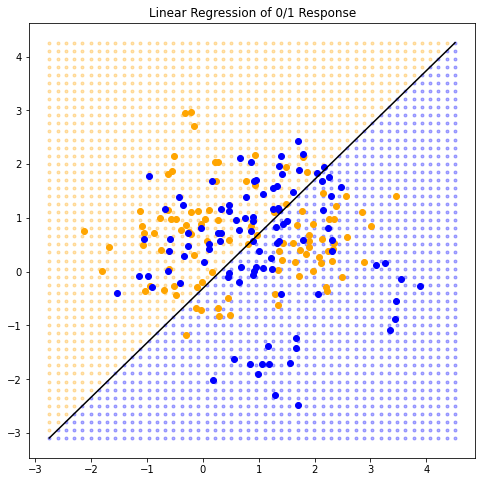

In [10]:
from itertools import filterfalse, product

def plot_grid(orange_grid, blue_grid):
    axes.plot(orange_grid[:, 0], orange_grid[:, 1], '.', zorder = 0.001,
              color='orange', alpha = 0.3, scalex = False, scaley = False)

    axes.plot(blue_grid[:, 0], blue_grid[:, 1], '.', zorder = 0.001,
          color='blue', alpha = 0.3, scalex = False, scaley = False)

plot_xlim = axes.get_xlim()
plot_ylim = axes.get_ylim()

grid = np.array([*product(np.linspace(*plot_xlim, 50), np.linspace(*plot_ylim, 50))])

is_orange = lambda x: model.predict(x) > 0.5

orange_grid = np.array([*filter(is_orange, grid)])
blue_grid = np.array([*filterfalse(is_orange, grid)])

axes.clear()
axes.set_title("Linear Regression of 0/1 Response")
plot_data(orange_data, blue_data)
plot_grid(orange_grid, blue_grid)

find_y = lambda x: (0.5 - model.beta[0] - x * model.beta[1]) / model.beta[2]
axes.plot(plot_xlim, [*map(find_y, plot_xlim)], color = 'black', 
          scalex = False, scaley = False)


fig

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('Iris.csv')
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
dataset.shape

(150, 6)

In [27]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [30]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

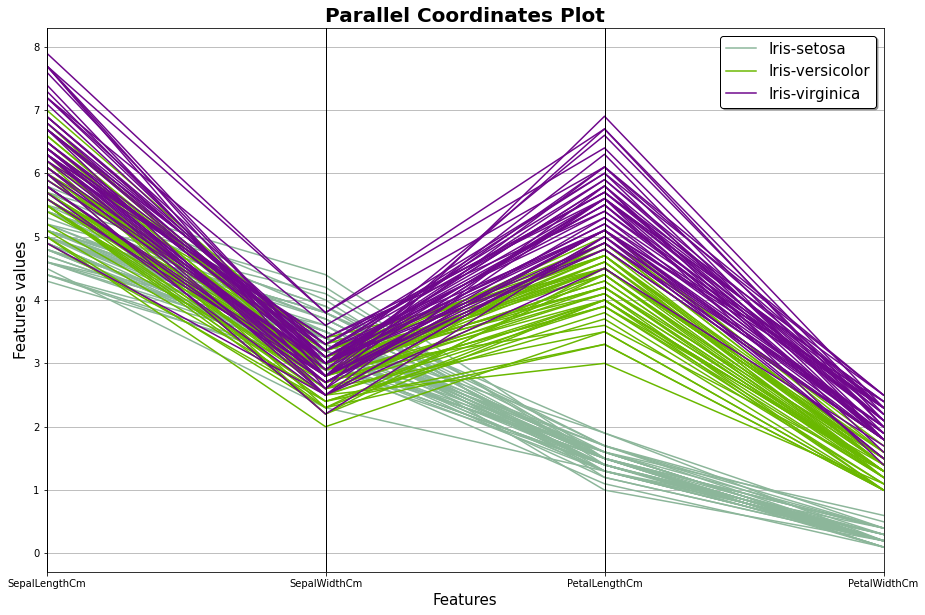

In [35]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

 #### Andrews Curves

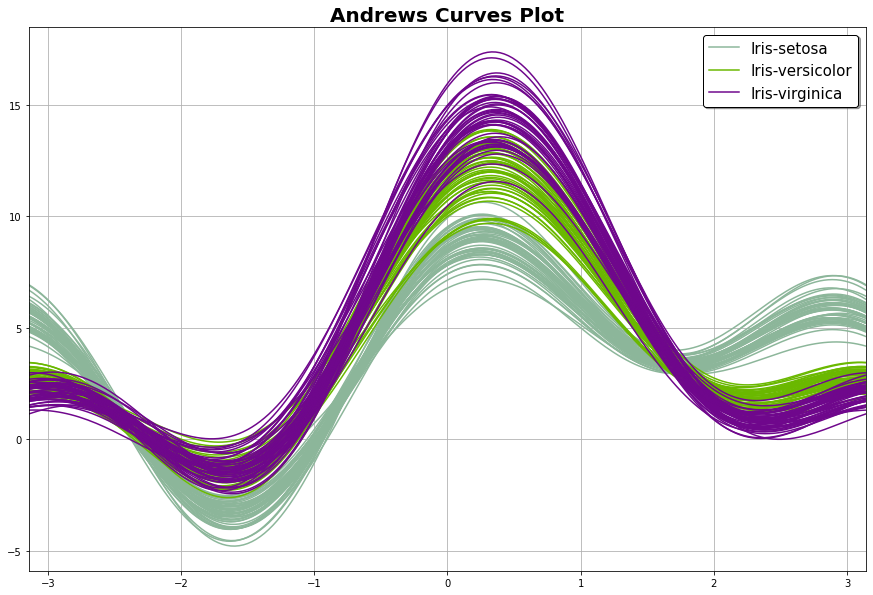

In [36]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

### Pairplot

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

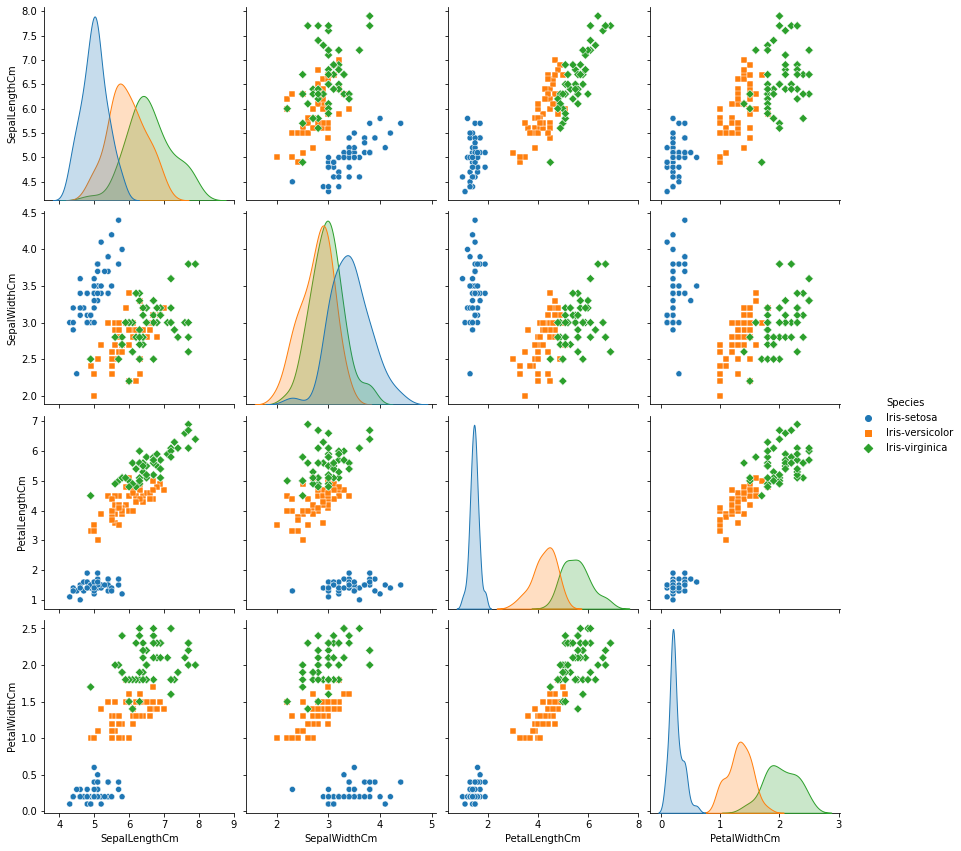

In [37]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

####  3D visualization

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


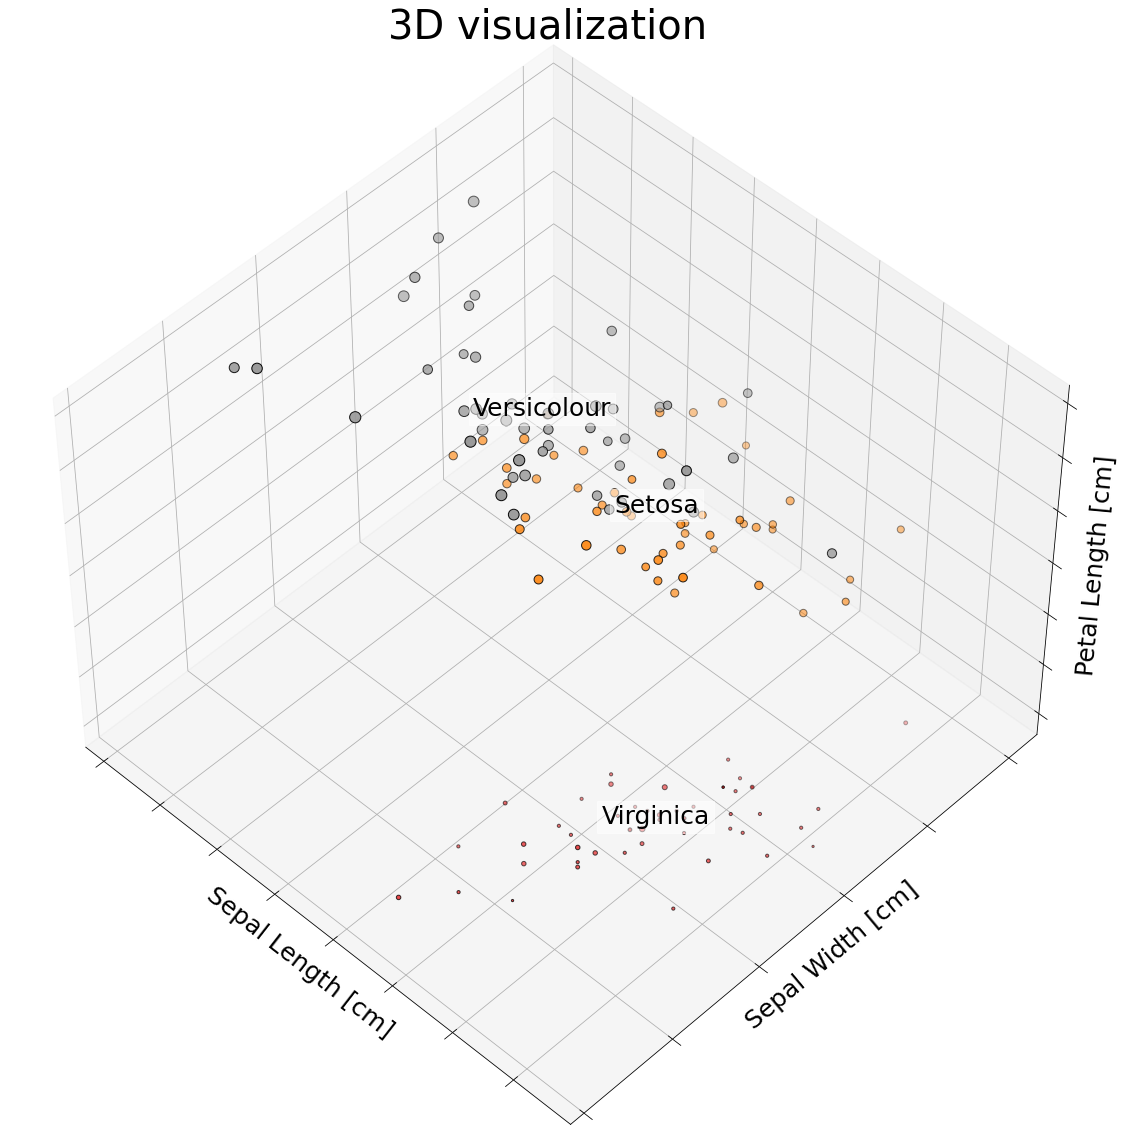

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()


In [39]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [41]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


##### Using cross-validation for parameter tuning

In [42]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

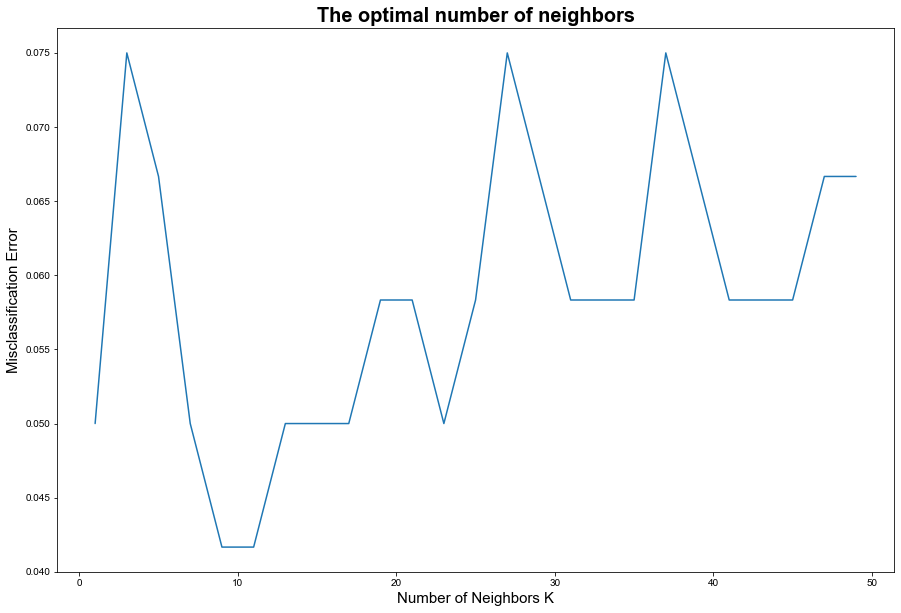

In [43]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [44]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


In [71]:
# simple implementation
import scipy as sp
from sklearn.model_selection import train_test_split
dataset.columns
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns ].values
y = y = dataset['Species'].values
# split dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
classes_ = np.unique(y)
n_predictions, n_features = X_test.shape
# allocationg space for array of predictions
n_samples = X_train.shape[0]
distances = np.empty(n_samples, dtype=np.float64)
predictions = np.empty(n_predictions, dtype=int)
for i in range( X_train.shape[0]):
      distances[i] = (X_train[i,:] - X[i]).dot(X_train[i,:] - X[i])
distances.shape

(120,)

In [73]:
distances = sp.c_[distances, y_train]
distances

array([[21.22, 'Iris-virginica', 'Iris-virginica'],
       [11.55, 'Iris-versicolor', 'Iris-versicolor'],
       [0.3799999999999999, 'Iris-setosa', 'Iris-setosa'],
       [16.380000000000003, 'Iris-virginica', 'Iris-virginica'],
       [24.239999999999995, 'Iris-virginica', 'Iris-virginica'],
       [7.32, 'Iris-versicolor', 'Iris-versicolor'],
       [1.460000000000001, 'Iris-setosa', 'Iris-setosa'],
       [16.409999999999997, 'Iris-versicolor', 'Iris-versicolor'],
       [11.790000000000001, 'Iris-versicolor', 'Iris-versicolor'],
       [8.519999999999998, 'Iris-versicolor', 'Iris-versicolor'],
       [22.06, 'Iris-virginica', 'Iris-virginica'],
       [0.13999999999999985, 'Iris-setosa', 'Iris-setosa'],
       [22.95, 'Iris-virginica', 'Iris-virginica'],
       [1.2400000000000002, 'Iris-setosa', 'Iris-setosa'],
       [0.3399999999999995, 'Iris-setosa', 'Iris-setosa'],
       [10.610000000000001, 'Iris-versicolor', 'Iris-versicolor'],
       [21.62, 'Iris-virginica', 'Iris-virgin

### Advantages of KNN

- No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.
- 2. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.
- KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

###  Disadvantages of KNN

1.Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing point is huge which degrades the performance of the algorithm.

2. Does not work well with high dimensions: The KNN algorithm doesn’t work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don’t do so, KNN

The least squares assumes that f(x) is well approximated by a globally linear function whereas knn assumes f(x) is well approximated by a locally constant function. KNN fails in high dimensional space because the neares neighbors need not be close to the target point and can result in large errors

FUNCTION APPROXIMATION
All we try to do is to approximate to the true function (relationship) between inputs and output. What ever you call it machine learning, statistical learning, mathematical modelling, and so on, they all have this aim. The aim is to find a useful approximation to f(x). We can treat supervised learning as a function estimation problem in this sense.

The majority of approximations have associated a set of parameters θ so that we can modify them to suit the data at hand. In linear regression those parameters are betas, β, (the coefficients). Linear basis expansions could be another class of useful approximation and sigmoid transformation common to neural networks could be an example of nonlinear transformation.